In [1]:
import numpy as np
from pso import *
import networkx as nx
import pandas as pd

In [3]:
def zero_one_knapsack(w, v, x):
    l = x.copy()
    l[x!=1] = 0
    taken_val = np.dot(l, v)
    return -taken_val
def knapsack(w, v, x):
    taken_val = np.dot(x, v)
    return -taken_val

In [54]:
def create_connected(n, m):
    is_comp = False
    while(not is_comp):
        G = nx.dense_gnm_random_graph(n, m)
        is_comp = nx.is_connected(G)
    return G

In [4]:
weights = [
    [95, 4, 60, 32, 23, 72, 80, 62, 65, 46],
    [80, 82, 85, 70, 72, 70, 66, 50, 55, 25, 50, 55, 40, 48, 59, 32, 22,60, 30, 32, 40, 38, 35, 32, 25, 28, 30, 22, 50, 30, 45, 30, 60, 50, 20,65, 20, 25, 30, 10, 20, 25, 15, 10, 10, 10, 4, 4, 2, 1],
    [54, 95, 36, 18, 4, 71, 83, 16, 27, 84, 88, 45, 94, 64, 14, 80, 4, 23,75, 36, 90, 20, 77, 32, 58, 6, 14, 86, 84, 59, 71, 21, 30, 22, 96, 49, 81,48, 37, 28, 6, 84, 19, 55, 88, 38, 51, 52, 79, 55, 70, 53, 64, 99, 61, 86,1, 64, 32, 60, 42, 45, 34, 22, 49, 37, 33, 1, 78, 43, 85, 24, 96, 32, 99,57, 23, 8, 10, 74, 59, 89, 95, 40, 46, 65, 6, 89, 84, 83, 6, 19, 45, 59,26, 13, 8, 26, 5, 9],
    ]
values = [
    [55, 10, 47, 5, 4, 50, 8, 61, 85, 87],
    [220, 208, 198, 192, 180, 180, 165, 162, 160, 158, 155, 130, 125,122, 120, 118, 115, 110, 105, 101, 100, 100, 98, 96, 95, 90, 88, 82,80, 77, 75, 73, 72, 70, 69, 66, 65, 63, 60, 58, 56, 50, 30, 20, 15, 10, 8,5, 3, 1],
    [297, 295, 293, 292, 291, 289, 284, 284, 283, 283, 281, 280, 279,277, 276, 275, 273,264, 260, 257, 250, 236, 236, 235, 235, 233, 232,232, 228, 218, 217, 214, 211, 208, 205, 204, 203, 201, 196, 194, 193,193, 192, 191, 190, 187, 187, 184, 184, 184, 181, 179, 176, 173, 172,171, 160, 128, 123, 114, 113, 107, 105, 101, 100, 100, 99, 98, 97, 94,94, 93, 91, 80, 74, 73, 72, 63, 63, 62, 61, 60, 56, 53, 52, 50, 48, 46,40, 40, 35, 28, 22, 22, 18, 15, 12, 11, 6, 5]
    ]
sizes = [269,1000,3818]
zo_opts = [295,3103, 15170]
opts = [295,3103, 15170]

In [51]:
grid_mat = nx.ring_of_cliques(100,4)
adj_matrix = nx.adjacency_matrix(grid_mat).todense()

In [ ]:
all_data = []
for w, v, SIZE in zip(weights, values, sizes):
    lb = [0] * len(w)
    ub = [1] * len(w)
    dim = len(w)
    knapsack_new = lambda x : knapsack(w, v, x)
    zero_one_knapsack_new = lambda x : zero_one_knapsack(w, v, x)
    knap_const = [
              lambda x : np.dot(x, w) - SIZE
              ]
    for num_swarm in range(12, 97, 12):
        for topology in ['random_1', 'random_2', '3_tribe', '4_tribe']:
            if topology == 'random_1':
                grid_mat = create_connected(num_swarm, int(4 * num_swarm / 3))
            if topology == '3_tribe':
                grid_mat = nx.ring_of_cliques(int(num_swarm/3),3)
            if topology == '4_tribe':
                grid_mat = nx.ring_of_cliques(int(num_swarm/4),4)
            if topology == 'random_2':
                grid_mat = create_connected(num_swarm, int(7 * num_swarm / 4))
            
            adj_matrix = nx.adjacency_matrix(grid_mat).todense()
            _, _, ks_conf, ks_score = run(knapsack_new, adj_matrix, epochs=10000,
                lb=lb, ub=ub,
                c0=0.90, c1=1, c2=2, c3=0,
                n=adj_matrix.shape[0], dim=dim,
                constraints=knap_const)
            _, _, zo_ks_conf, zo_ks_score = run(zero_one_knapsack_new, adj_matrix, epochs=10000,
                lb=lb, ub=ub,
                c0=0.90, c1=1, c2=2, c3=0,
                n=adj_matrix.shape[0], dim=dim,
                constraints=knap_const)
            log = {
                'problem_size': len(w),
                'num_swarm': num_swarm,
                'topology': topology,
                'knapsack_ans':ks_conf,
                'knapsack_score':ks_score,
                'zo_knapsack_ans':zo_ks_conf,
                'zo_knapsack_score':zo_ks_score,
            }
            all_data.append(log)

In [68]:
df = pd.DataFrame(all_data)
df.to_csv('answer.csv')

In [69]:
df

,problem_size,num_swarm,topology,knapsack_ans,knapsack_score,zo_knapsack_ans,zo_knapsack_score
0,10,12,random_1,"[0.7922491650689855, 1.0, 0.07215027339060481,...",-298.233383,"[0.23086089051322567, 1.0, 0.06106278513612559...",-168.0
1,10,12,random_2,"[0.21821986493819037, 1.0, 0.9911572126000306,...",-295.508943,"[0.0, 0.23059772457281175, 0.48180910618260453...",-202.0
2,10,12,3_tribe,"[0.26721088013395905, 0.9999999904881001, 0.99...",-305.759916,"[0.31599856412250504, 1.0, 1.0, 0.126600071156...",-205.0
3,10,12,4_tribe,"[0.22176133105287857, 0.9994919426877448, 0.99...",-303.833846,"[0.07541616340217312, 0.16366058901549127, 1.0...",-105.0
4,10,24,random_1,"[0.1824478122636078, 0.999999999706477, 0.5118...",-307.616222,"[0.665043310389021, 1.0, 1.0, 0.03233267746637...",-152.0
...,...,...,...,...,...,...,...
91,100,84,4_tribe,"[0.999999999726094, 0.9999999999718477, 0.9999...",-15166.160131,"[1.0, 1.0606668876279074e-10, 1.0, 1.0, 1.0, 0...",-10131.0
92,100,96,random_1,"[1.0, 1.0, 1.0, 1.0, 0.9999999999999996, 1.0, ...",-15162.612858,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",-12979.0
93,100,96,random_2,"[0.9999999999994195, 0.9999999999918303, 0.999...",-15167.844673,"[0.02616456456409011, 1.0, 1.0, 0.017665761575...",-12696.0
94,100,96,3_tribe,"[1.0, 0.9999995359504203, 0.9999999817681882, ...",-15169.648989,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.192...",-12388.0


In [70]:
import seaborn as sns

<Axes: xlabel='num_swarm', ylabel='zo_knapsack_score'>

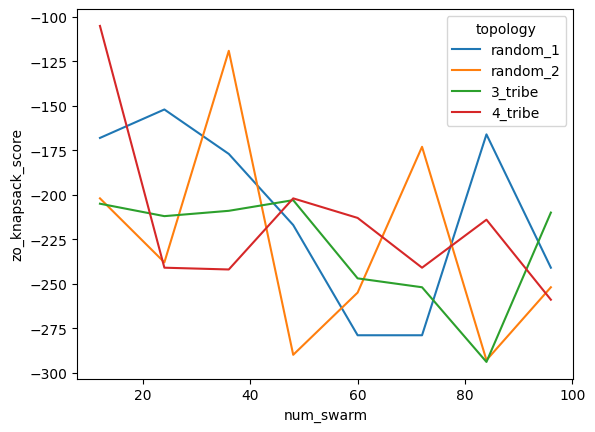

In [71]:
sns.lineplot(df[df['problem_size']==10], x = 'num_swarm', y = 'zo_knapsack_score', hue='topology')

<Axes: xlabel='num_swarm', ylabel='zo_knapsack_score'>

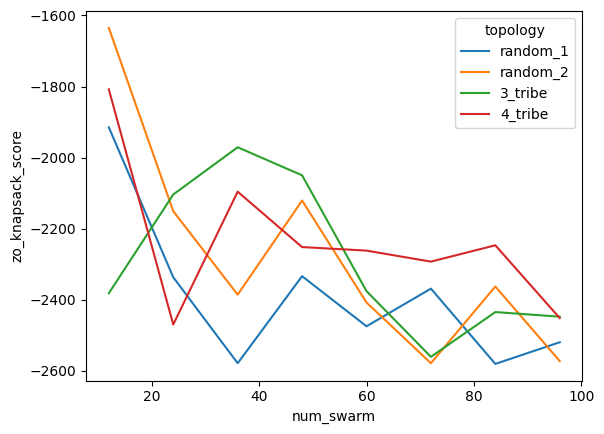

In [72]:
sns.lineplot(df[df['problem_size']==50], x = 'num_swarm', y = 'zo_knapsack_score', hue='topology')

<Axes: xlabel='num_swarm', ylabel='zo_knapsack_score'>

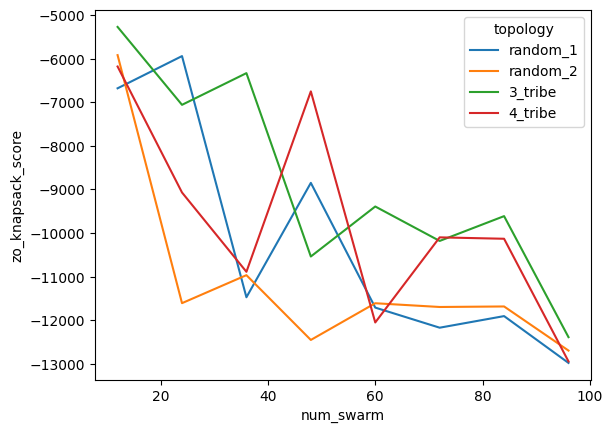

In [73]:
sns.lineplot(df[df['problem_size']==100], x = 'num_swarm', y = 'zo_knapsack_score', hue='topology')

<Axes: xlabel='num_swarm', ylabel='knapsack_score'>

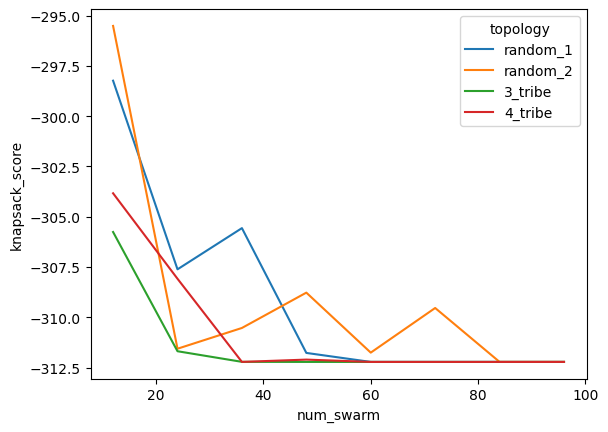

In [74]:
sns.lineplot(df[df['problem_size']==10], x = 'num_swarm', y = 'knapsack_score', hue='topology')

<Axes: xlabel='num_swarm', ylabel='knapsack_score'>

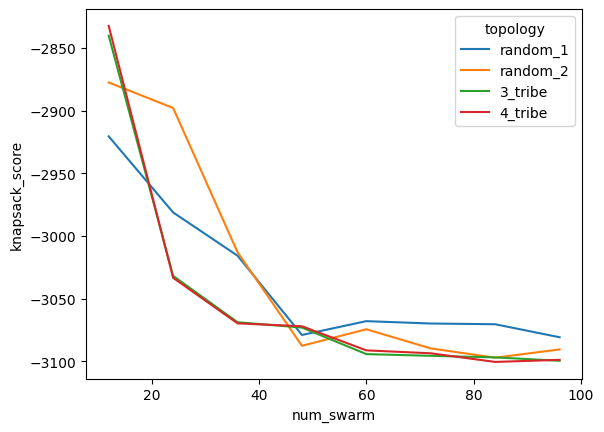

In [75]:
sns.lineplot(df[df['problem_size']==50], x = 'num_swarm', y = 'knapsack_score', hue='topology')

<Axes: xlabel='num_swarm', ylabel='knapsack_score'>

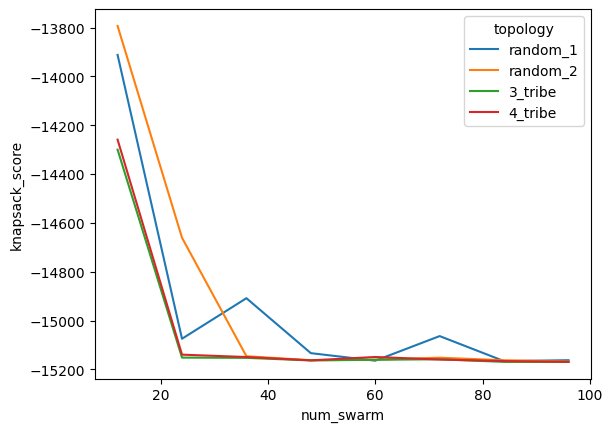

In [76]:
sns.lineplot(df[df['problem_size']==100], x = 'num_swarm', y = 'knapsack_score', hue='topology')